In [1]:
pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.3 MB 1.8 MB/s eta 0:00:03
   ----------- ---------------------------- 1.6/5.3 MB 2.5 MB/s eta 0:00:02
   --------------- ------------------------ 2.1/5.3 MB 2.5 MB/s eta 0:00:02
   --------------------- ------------------ 2.9/5.3 MB 2.8 MB/s eta 0:00:01
   ----------------------------- ---------- 3.9/5.3 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 4.5/5.3 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.1 MB 2.4 MB/s eta 0:00:11
   -- -----

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [4]:
(train, test) = tfds.load('mnist', split=['train','test'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\etjdr\tensorflow_datasets\mnist\incomplete.PP23KH_3.0.1\mnist-train.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\etjdr\tensorflow_datasets\mnist\incomplete.PP23KH_3.0.1\mnist-test.tfrecord*...:   0%|     …

Dataset mnist downloaded and prepared to C:\Users\etjdr\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [11]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto',sparse_output=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2762422659544763
Max: 244.94693302857056


In [8]:
from tensorflow.keras import layers

In [9]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [13]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init,activate)
model_zeros.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test,y_test))

C:\Users\etjdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1059 - loss: 2.3026 - val_accuracy: 0.1090 - val_loss: 2.3025
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1139 - loss: 2.3025 - val_accuracy: 0.1090 - val_loss: 2.3025
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1145 - loss: 2.3025 - val_accuracy: 0.1090 - val_loss: 2.3024
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1096 - loss: 2.3024 - val_accuracy: 0.1090 - val_loss: 2.3024
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1117 - loss: 2.3024 - val_accuracy: 0.1090 - val_loss: 2.3024
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1114 - loss: 2.3024 - val_accuracy: 0.1090 - val_loss: 2.3023
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1111 - loss: 2.3023 - val_accuracy: 0.1090 - val_loss: 2.3023
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1117 - loss: 2.3022 - val_accuracy: 0.1090 - val_los

In [14]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_zeros = simple_model(init,activate)
model_zeros.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test,y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1085 - loss: 2.3025 - val_accuracy: 0.1090 - val_loss: 2.3022
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1125 - loss: 2.3021 - val_accuracy: 0.1090 - val_loss: 2.3019
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1117 - loss: 2.3018 - val_accuracy: 0.1090 - val_loss: 2.3017
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1127 - loss: 2.3015 - val_accuracy: 0.1090 - val_loss: 2.3016
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1116 - loss: 2.3015 - val_accuracy: 0.1090 - val_loss: 2.3015
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1090 - val_loss: 2.3015
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1123 - loss: 2.3012 - val_accuracy: 0.1090 - val_loss: 2.3015
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1130 - loss: 2.3012 - val_accuracy: 0.1090 - val_loss

In [15]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1420 - loss: 2.3005 - val_accuracy: 0.2018 - val_loss: 2.2985
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2020 - loss: 2.2978 - val_accuracy: 0.1810 - val_loss: 2.2959
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1872 - loss: 2.2947 - val_accuracy: 0.2028 - val_loss: 2.2919
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2141 - loss: 2.2902 - val_accuracy: 0.2405 - val_loss: 2.2845
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2550 - loss: 2.2807 - val_accuracy: 0.2700 - val_loss: 2.2670
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2787 - loss: 2.2567 - val_accuracy: 0.2649 - val_loss: 2.2091
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2685 - loss: 2.1744 - val_accuracy: 0.2760 - val_loss: 2.0614
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3073 - loss: 2.0170 - val_accuracy: 0.3714 - val_loss

In [16]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1578 - loss: 2.2928 - val_accuracy: 0.3408 - val_loss: 2.0729
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3776 - loss: 1.9939 - val_accuracy: 0.4852 - val_loss: 1.6446
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5083 - loss: 1.5129 - val_accuracy: 0.6591 - val_loss: 1.1254
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6983 - loss: 1.0147 - val_accuracy: 0.8096 - val_loss: 0.7255
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8171 - loss: 0.6542 - val_accuracy: 0.8521 - val_loss: 0.5371
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.4794 - val_accuracy: 0.8755 - val_loss: 0.4482
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8837 - loss: 0.3967 - val_accuracy: 0.8849 - val_loss: 0.3952
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9011 - loss: 0.3416 - val_accuracy: 0.8949 - val_loss

In [17]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2645 - loss: 2.0921 - val_accuracy: 0.6470 - val_loss: 1.2461
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7009 - loss: 1.0465 - val_accuracy: 0.8175 - val_loss: 0.6398
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8318 - loss: 0.5810 - val_accuracy: 0.8588 - val_loss: 0.4943
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8713 - loss: 0.4499 - val_accuracy: 0.8787 - val_loss: 0.4291
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8924 - loss: 0.3806 - val_accuracy: 0.8916 - val_loss: 0.3850
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9056 - loss: 0.3341 - val_accuracy: 0.8986 - val_loss: 0.3565
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9123 - loss: 0.3108 - val_accuracy: 0.9050 - val_loss: 0.3348
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9210 - loss: 0.2802 - val_accuracy: 0.9100 - val_l

Text(0, 0.5, 'validation accuracy')

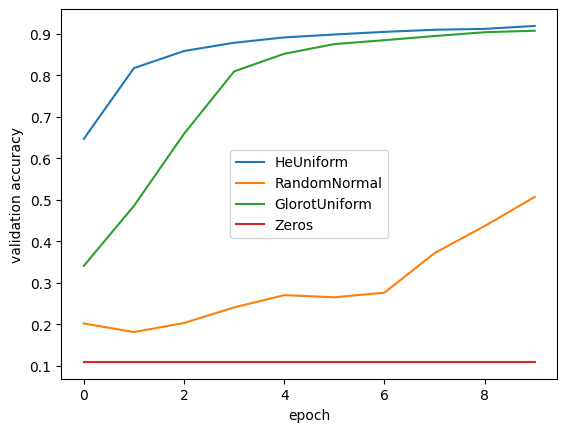

In [18]:
for i in [model_he, model_normal, model_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('epoch')
plt.ylabel('validation accuracy')

In [19]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())                
    ])

In [20]:
simple_model_bn().summary()

C:\Users\etjdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,130 (113.79 KB)

 Trainable params: 28,874 (112.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [21]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1372 - loss: 2.3017 - val_accuracy: 0.1150 - val_loss: 2.2997
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1184 - loss: 2.2992 - val_accuracy: 0.1143 - val_loss: 2.2976
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1194 - loss: 2.2971 - val_accuracy: 0.1175 - val_loss: 2.2950
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1216 - loss: 2.2945 - val_accuracy: 0.1287 - val_loss: 2.2911
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1364 - loss: 2.2902 - val_accuracy: 0.1556 - val_loss: 2.2850
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1619 - loss: 2.2834 - val_accuracy: 0.1925 - val_loss: 2.2742
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1959 - loss: 2.2716 - val_accuracy: 0.2238 - val_loss: 2.2526
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2326 - loss: 2.2452 - val_accuracy: 0.3053 - val_

In [22]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2024 - loss: 2.2727 - val_accuracy: 0.5332 - val_loss: 1.5146
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6291 - loss: 1.3095 - val_accuracy: 0.7951 - val_loss: 0.7728
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.6885 - val_accuracy: 0.8611 - val_loss: 0.5145
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8668 - loss: 0.4671 - val_accuracy: 0.8825 - val_loss: 0.4226
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8911 - loss: 0.3794 - val_accuracy: 0.8930 - val_loss: 0.3781
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9019 - loss: 0.3319 - val_accuracy: 0.9012 - val_loss: 0.3481
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9127 - loss: 0.2976 - val_accuracy: 0.9067 - val_loss: 0.3294
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.2720 - val_accuracy: 0.9126 - val_loss

In [23]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4354 - loss: 1.6765 - val_accuracy: 0.8502 - val_loss: 0.5256
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8604 - loss: 0.4649 - val_accuracy: 0.8959 - val_loss: 0.3598
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9119 - loss: 0.3068 - val_accuracy: 0.9131 - val_loss: 0.3042
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9266 - loss: 0.2509 - val_accuracy: 0.9146 - val_loss: 0.2882
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9383 - loss: 0.2119 - val_accuracy: 0.9249 - val_loss: 0.2590
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.1884 - val_accuracy: 0.9303 - val_loss: 0.2525
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.1764 - val_accuracy: 0.9254 - val_loss: 0.2615
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9550 - loss: 0.1549 - val_accuracy: 0.9384 - val_loss

In [26]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2178 - loss: 2.2347 - val_accuracy: 0.5681 - val_loss: 1.3953
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6408 - loss: 1.2012 - val_accuracy: 0.7910 - val_loss: 0.7095
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8143 - loss: 0.6148 - val_accuracy: 0.8680 - val_loss: 0.4821
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8820 - loss: 0.4031 - val_accuracy: 0.8897 - val_loss: 0.3919
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9091 - loss: 0.3100 - val_accuracy: 0.9024 - val_loss: 0.3391
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9206 - loss: 0.2723 - val_accuracy: 0.9124 - val_loss: 0.3055
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9331 - loss: 0.2319 - val_accuracy: 0.9200 - val_loss: 0.2804
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9414 - loss: 0.2045 - val_accuracy: 0.9234 - val_loss

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data=(X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

C:\Users\etjdr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8406 - loss: 0.5197 - val_accuracy: 0.9408 - val_loss: 0.1991
Epoch 2/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9378 - loss: 0.2015 - val_accuracy: 0.9428 - val_loss: 0.1919
Epoch 3/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9508 - loss: 0.1630 - val_accuracy: 0.9494 - val_loss: 0.1663
Epoch 4/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9580 - loss: 0.1395 - val_accuracy: 0.9543 - val_loss: 0.1620
Epoch 5/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9620 - loss: 0.1238 - val_accuracy: 0.9570 - val_loss: 0.1537
Epoch 6/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1082 - val_accuracy: 0.9592 - val_loss: 0.1540
Epoch 7/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9684 - loss: 0.1005 - val_accuracy: 0.9578 - val_loss: 0.1479
Epoch 8/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 -